In [3]:
from pathlib import Path
import numpy as np
from natsort import natsorted
from ase.units import kcal, mol, eV, Hartree, Bohr, Angstrom
from ase.io import read as aseread
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [33]:
def read_xyz_files(directory):
    """
    Read all .xyz files in the given directory and return a list of ASE Atoms objects.
    
    Parameters:
        directory (str): Path to the directory containing .xyz files.
        
    Returns:
        List of ASE Atoms objects.
    """
    atoms_list = []
    xyz_files = glob.glob(os.path.join(directory, "*.xyz"))
    for file in xyz_files:
        try:
            atoms = read(file)
            atoms_list.append(atoms)
        except Exception as e:
            print(f"Error reading {file}: {e}")
    return atoms_list

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from ase.io import read  # ASE's I/O library for reading structure files [5]

def plot_traj(atoms_list, title, bins=50, use_log=True):
    """
    Compute the φ and ψ dihedral angles for alanine dipeptide and plot them.  
    
    For alanine dipeptide:
      • φ (phi) is defined by atoms with 1-indexing: 6, 8, 14, 16, which correspond to
        5, 7, 13, 15 in zero-indexed ASE.
      • ψ (psi) is defined by atoms with 1-indexing: 4, 6, 8, 14, corresponding to 3, 5, 7, 13.
    
    The ASE get_dihedral method returns the value in degrees [5]. The angles are then wrapped 
    to the range [-180, 180).
    
    Parameters:
        atoms_list (list): List of ASE Atoms objects.
        title (str): Title for the plot and output filename.
    """
    phi_list, psi_list = [], []
    
    for atoms in atoms_list:
        # Use ASE's built-in get_dihedral (returns the dihedral angle in degrees)
        phi_deg = atoms.get_dihedral(4, 6, 8, 14, mic=False)  # Equivalent to (6,8,14,16) in 1-indexed notation [5]
        psi_deg = atoms.get_dihedral(16, 14, 8, 6, mic=False)   # Equivalent to (4,6,8,14) in 1-indexed notation [5]
        
        # Wrap angles to the [-180, 180) range
        phi_deg = (phi_deg + 180) % 360 - 180
        psi_deg = (psi_deg + 180) % 360 - 180
        
        phi_list.append(phi_deg)
        psi_list.append(psi_deg)
    norm = colors.LogNorm() if use_log else None
    plt.figure(figsize=(8,6))
    plt.xlabel(r'$\phi$ (degrees)', fontsize=20)
    plt.ylabel(r'$\psi$ (degrees)', fontsize=20)
    plt.title(title, fontsize=22)

    counts, xedges, yedges, im = plt.hist2d(phi_list, psi_list,
                                              bins=bins,
                                              cmap='viridis',
                                              norm=norm)
    
    # Add a colorbar with a label for clarity
    cbar = plt.colorbar(im)
    cbar.set_label('Counts', fontsize=16)
    
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.tight_layout()
    plt.savefig(title + "_density.png", dpi=300, transparent=True)
    plt.show()

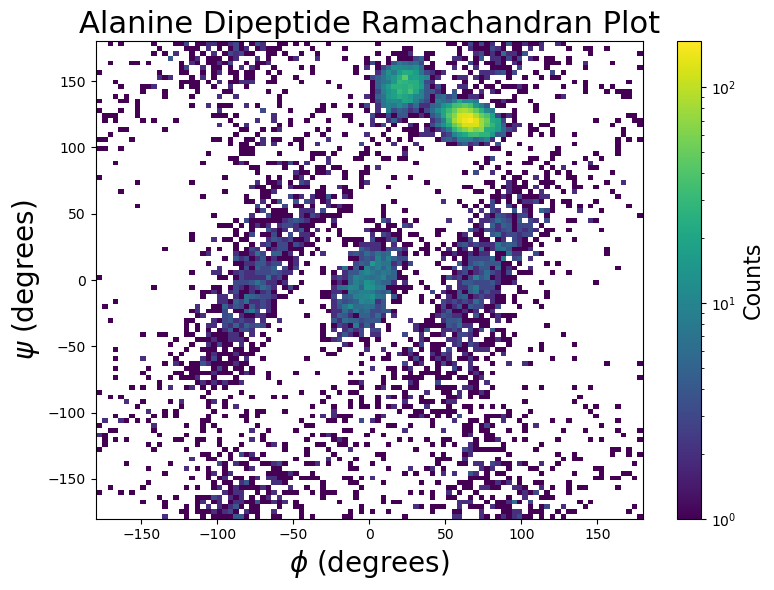

In [26]:
# Set the directory containing your .xyz files
xyz_directory = "/usr/projects/ml4chem/NikitaFedik/TPS/revision/AZ_thermal_md/xyz_sdf"

# Read .xyz files via ASE to obtain a list of Atoms objects
atoms_list = read_xyz_files(xyz_directory)

if not atoms_list:
    print("No valid .xyz files found. Check your directory path and file formats.")
else:
    plot_traj(atoms_list, "Alanine Dipeptide Ramachandran Plot", bins=100, use_log=True)

In [40]:
def transform_omega(omega):

    if omega > np.degrees(np.pi):  # If omega > 180 degrees
        omega -= np.degrees(2 * np.pi)  # Subtract 360 degrees
    return -omega  # Finally, flip the sign

In [41]:
def plot_azobenzene_histogram(atoms_list, title, bins=50, log_scale=False):
    """
    Compute and plot a 1D histogram of the azobenzene dihedral angle (omega).
    
    For azobenzene, the dihedral angle is defined by atoms with indices:
      - 0, 11, 12, and 13 (python indexing).
    
    The dihedral angle is computed (in degrees) via ASE’s get_dihedral method,
    wrapped to [-180, 180), and plotted as a histogram. Logarithmic scaling can
    be applied to the y-axis for better visualization of low-count regions.
    
    Parameters:
        atoms_list (list): List of ASE Atoms objects.
        title (str): Title for the plot and output filename.
        bins (int or array-like): Number of bins or bin edges for the histogram.
        log_scale (bool): Whether to use logarithmic scaling for the y-axis.
    """
    omega_angles = []
    
    # Loop over each structure and extract the dihedral angle
    for atoms in atoms_list:
        # Compute the dihedral angle using indices 0, 11, 12, 13
        omega = atoms.get_dihedral(0, 11, 12, 13, mic=False)
        # Wrap the angle to the range [-180, 180)
        # omega = (omega + 180) % 360 - 180
        omega = transform_omega(omega)
        omega_angles.append(omega)
        

    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(omega_angles, bins=bins, color='blue', alpha=0.7)
    
    # Set axis labels and title
    plt.xlabel('Dihedral Angle (degrees)', fontsize=16)
    plt.ylabel('Counts', fontsize=16)
    plt.title(title, fontsize=18)
    
    # Apply logarithmic scaling if specified
    if log_scale:
        plt.yscale('log')
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig(title + "_histogram.png", dpi=300, transparent=True)
    plt.show()



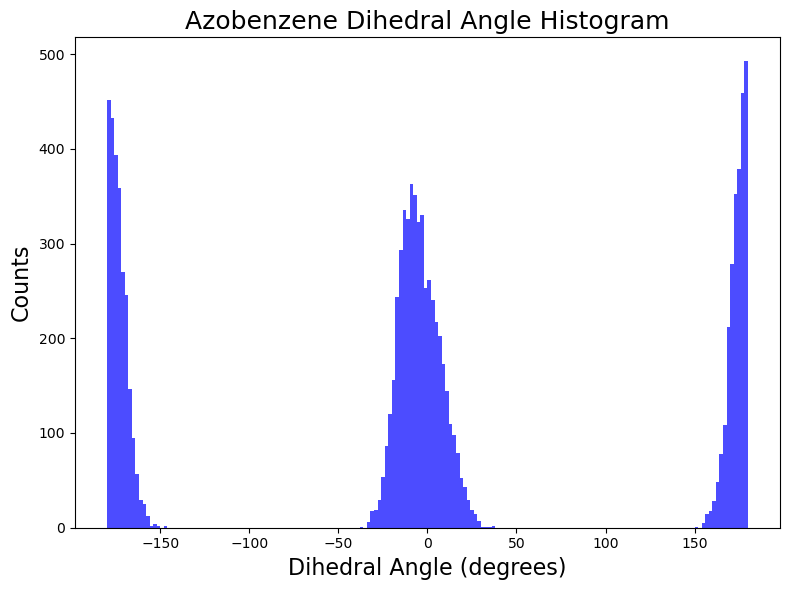

In [43]:

# Specify the directory where your azobenzene .xyz files are located
az_xyz_directory = "/usr/projects/ml4chem/NikitaFedik/TPS/revision/AZ_thermal_md/xyz_sdf"

# Read all .xyz files into a list of ASE Atoms objects
atoms_list = read_xyz_files(az_xyz_directory)

if not atoms_list:
    print("No valid .xyz files found. Please check your directory path and file formats.")
else:
    # Plot a histogram of omega angles with optional logarithmic scaling
    plot_azobenzene_histogram(atoms_list,
                                title="Azobenzene Dihedral Angle Histogram",
                                bins=180,
                                log_scale=False)